# **Supervised Learning - Attrition**

Alan Nuzulan - 2009106032 - POSTTEST 5 KB

Import Library

In [1]:
#Import Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
#Membaca dan Melihat Dataset

dataset = pd.read_csv("Attrition-Clean.csv")
dataset.head()

,Unnamed: 0,Umur,Kelamin,Pendidikan,RateHarian,JarakDariRumah,KepuasanKerja,TotalBekerjaSetahun,Attrition,Departemen_Human Resources,Departemen_Research & Development,Departemen_Sales,BisnisPerjalanan_Non-Travel,BisnisPerjalanan_Travel_Frequently,BisnisPerjalanan_Travel_Rarely
0,0,41,0,2,1102.0,1,3,8,Yes,0,0,1,0,0,1
1,1,49,1,1,279.0,8,2,10,No,0,1,0,0,1,0
2,2,37,1,2,1373.0,2,2,7,Yes,0,1,0,0,0,1
3,3,33,0,4,1392.0,3,3,8,No,0,1,0,0,1,0
4,4,27,1,1,591.0,2,3,6,No,0,1,0,0,0,1


## **DATA SPLIT**

In [3]:
# Membagi data menjadi x dan y

x = dataset.drop(['Attrition','Unnamed: 0'], axis=1)
y = dataset[["Attrition"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x.head()

,Umur,Kelamin,Pendidikan,RateHarian,JarakDariRumah,KepuasanKerja,TotalBekerjaSetahun,Departemen_Human Resources,Departemen_Research & Development,Departemen_Sales,BisnisPerjalanan_Non-Travel,BisnisPerjalanan_Travel_Frequently,BisnisPerjalanan_Travel_Rarely
0,41,0,2,1102.0,1,3,8,0,0,1,0,0,1
1,49,1,1,279.0,8,2,10,0,1,0,0,1,0
2,37,1,2,1373.0,2,2,7,0,1,0,0,0,1
3,33,0,4,1392.0,3,3,8,0,1,0,0,1,0
4,27,1,1,591.0,2,3,6,0,1,0,0,0,1


## **ALGORITMA DECISION TREE**

In [4]:
# Menggunakan Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [5]:
# klasifikasi report

dt_pred = dt.predict(x_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

          No       0.87      0.81      0.84       375
         Yes       0.23      0.32      0.26        66

    accuracy                           0.73       441
   macro avg       0.55      0.56      0.55       441
weighted avg       0.77      0.73      0.75       441



In [6]:
# Akurasi dari Algoritma Decision Tree

acc_dt = accuracy_score(y_test, dt_pred)
print("Akurasi algoritma Decision Tree :", round(acc_dt,3))

Akurasi algoritma Decision Tree : 0.735


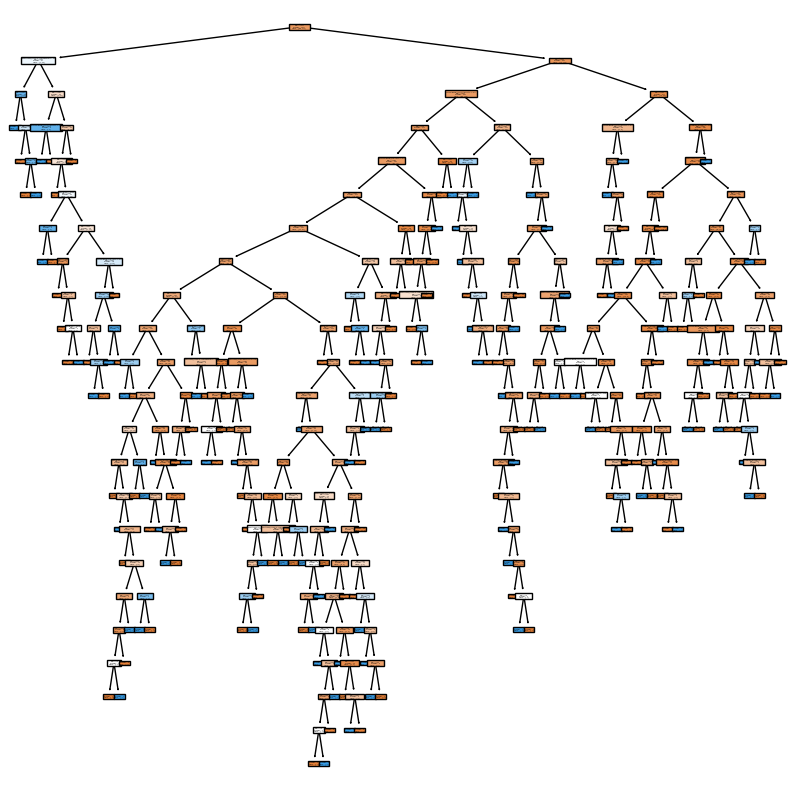

In [7]:
# Ploting Decision Tree

from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(dt,feature_names=x.columns,filled=True)
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


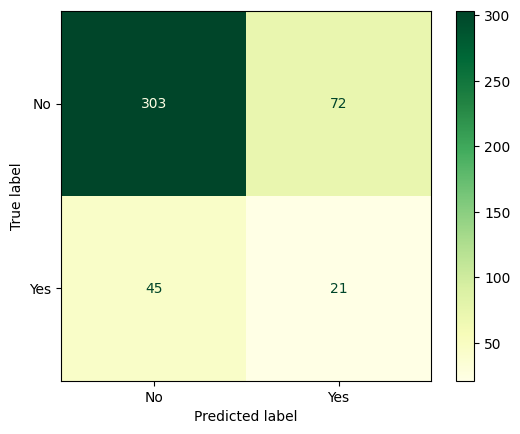

In [8]:
# Ploting confusion matrix dari Decision Tree

plot_confusion_matrix(dt, x_test, y_test, cmap="YlGn")

## **ALGORITMA SUPORT VECTOR MACHINE**

In [9]:
from sklearn.svm import SVC

#Latih model dari SVM Classifier
svm = SVC()
svm.fit(x_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [10]:
# klasifikasi report

svm_pred = svm.predict(x_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

          No       0.85      1.00      0.92       375
         Yes       0.00      0.00      0.00        66

    accuracy                           0.85       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.72      0.85      0.78       441



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [11]:
# Akurasi algoritma SVM

acc_svm = accuracy_score(y_test, svm_pred)
print("Akurasi algoritma SVM :", round(acc_svm,2))

Akurasi algoritma SVM : 0.85


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


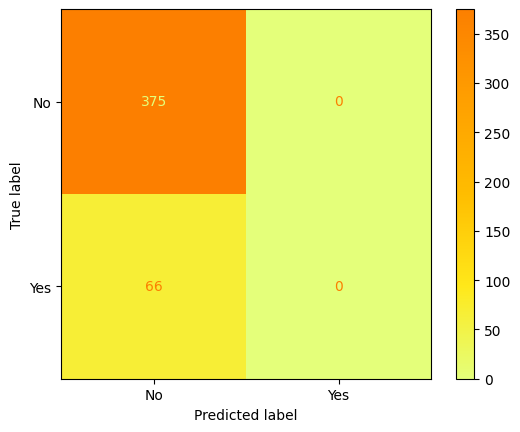

In [12]:
# Ploting confusion matrix dari SVM

plot_confusion_matrix(svm, x_test, y_test, cmap="Wistia")
plt.show()

## **ALGORITMA K-NEAREST NEIGHBORS**

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [14]:
# Akurasi menggunakan Algoritma KNN

acc_knn = knn.score(x_test, y_test)
print("Akurasi algoritma KNN :", round(acc_svm,2))

Akurasi algoritma KNN : 0.85


In [15]:
#Klasifikasi report

y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.96      0.90       375
         Yes       0.20      0.06      0.09        66

    accuracy                           0.82       441
   macro avg       0.53      0.51      0.50       441
weighted avg       0.76      0.82      0.78       441



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


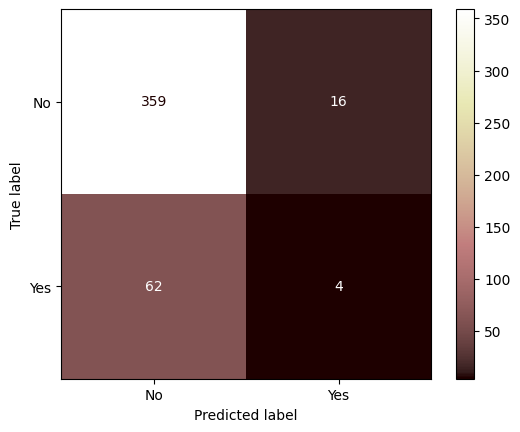

In [16]:
# Plotting data menggunakan KNN

confusion_matrix(y_test, y_pred)
plot_confusion_matrix(knn, x_test, y_test, cmap='pink')

## **ALGORITMA NAIVE BAYES**

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

gnb = GaussianNB()
mnb = MultinomialNB()

In [18]:
gnb.fit(x_train, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [19]:
mnb.fit(x_train, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [20]:
# Klasifikasi report

gnb_pred = gnb.predict(x_test)
mnb_pred = mnb.predict(x_test)
print("Gaussian NB : ")
print(classification_report(y_test, gnb_pred))
print("Multinomial NB : ")
print(classification_report(y_test, mnb_pred))

Gaussian NB : 
              precision    recall  f1-score   support

          No       0.88      0.89      0.89       375
         Yes       0.34      0.32      0.33        66

    accuracy                           0.81       441
   macro avg       0.61      0.61      0.61       441
weighted avg       0.80      0.81      0.80       441

Multinomial NB : 
              precision    recall  f1-score   support

          No       0.89      0.78      0.83       375
         Yes       0.27      0.45      0.34        66

    accuracy                           0.73       441
   macro avg       0.58      0.62      0.58       441
weighted avg       0.80      0.73      0.76       441



In [21]:
# Skor menggunakan Algoritma GNB

acc_gnb = gnb.score(x_test, y_test)
print("Akurasi algoritma GNB :", round(acc_gnb,2))

Akurasi algoritma GNB : 0.81


In [22]:
# Skor menggunakan Algoritma MNB

acc_mnb = mnb.score(x_test, y_test)
print("Akurasi algoritma MNB :", round(acc_mnb,2))

Akurasi algoritma MNB : 0.73


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


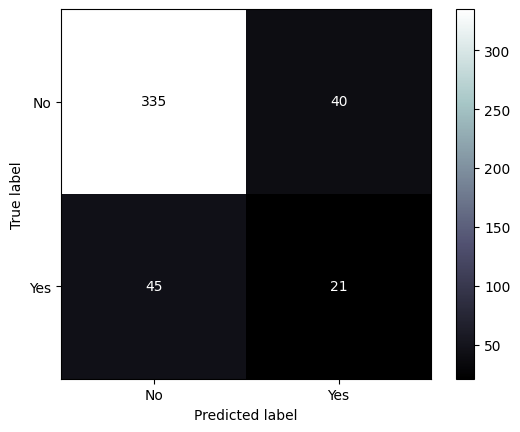

In [23]:
# Plotting Algoritma GNB

plot_confusion_matrix(gnb, x_test, y_test,  cmap='bone')

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


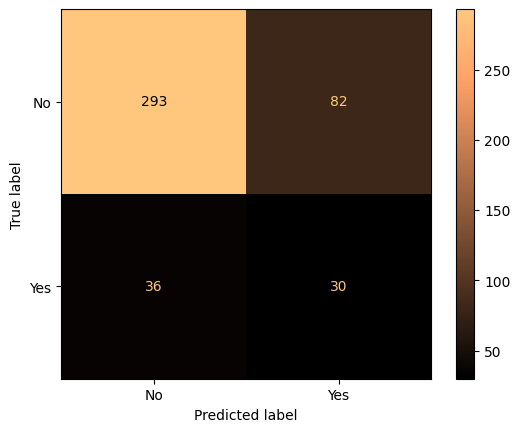

In [24]:
# Plotting Algoritma MNB

plot_confusion_matrix(mnb, x_test, y_test, cmap = "copper")

## **PERBANDINGAN AKURASI ALGORITMA**

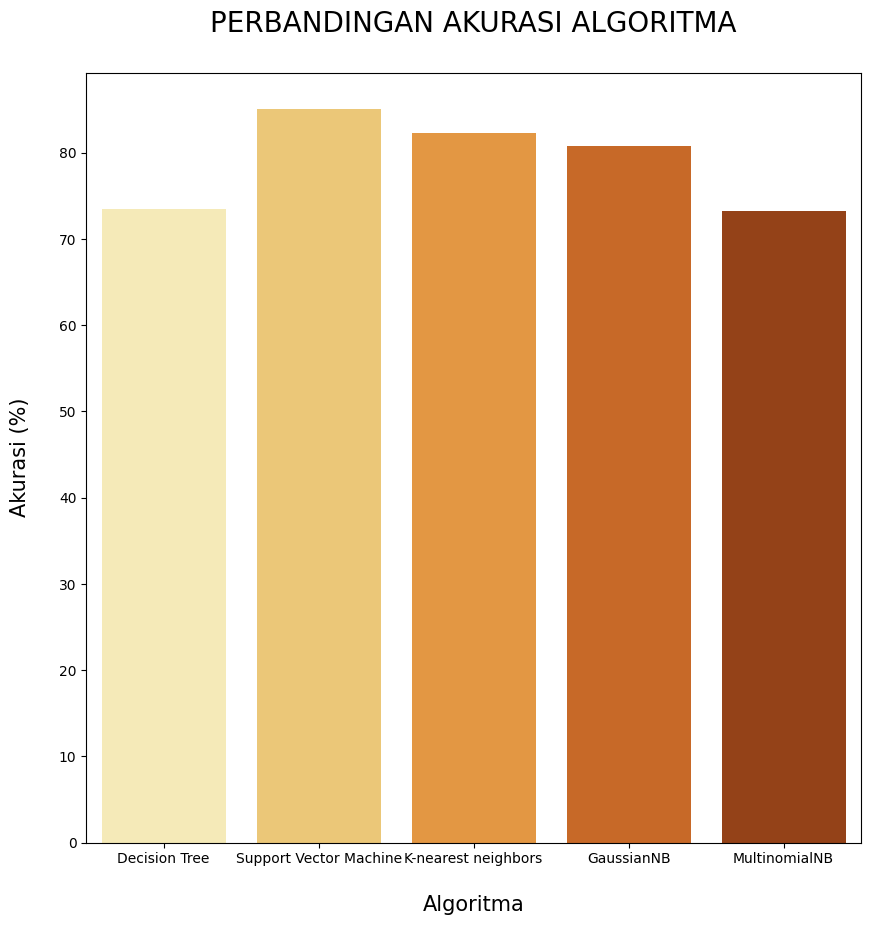

In [25]:


algoritma = ["Decision Tree","Support Vector Machine","K-nearest neighbors","GaussianNB", "MultinomialNB"]
nilaiPrediksi = [acc_dt*100,acc_svm*100,acc_knn*100,acc_gnb*100,acc_mnb*100]

plt.figure(figsize=(10,10))
color = ['green','red','blue','black','brown']
sns.barplot(x= algoritma,y = nilaiPrediksi, palette='YlOrBr')
plt.title("PERBANDINGAN AKURASI ALGORITMA\n", fontsize=20)
plt.ylabel("Akurasi (%)\n",  fontsize=15)
plt.xlabel("\nAlgoritma",  fontsize=15)
plt.show()

## **CONFUSION MATRIX**

In [26]:
#Import library
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

Confusion matrix

 [[308  67]
 [ 46  20]]


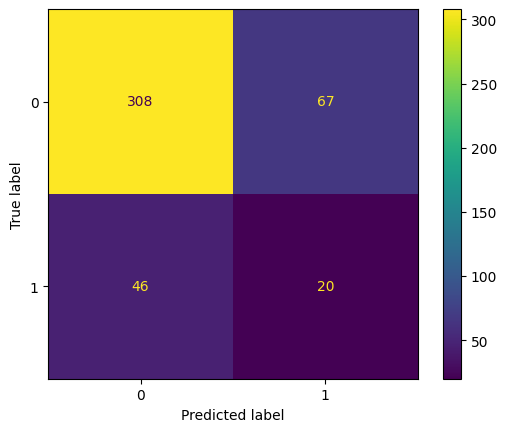

In [27]:
# Ploting confusion matrix

clf = DecisionTreeClassifier()
dt = clf.fit(x_train, y_train)


dt_pred = dt.predict(x_test)

dt_cm = confusion_matrix(y_test, dt_pred)
print('Confusion matrix\n\n', dt_cm)

disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm)
disp.plot()
plt.grid(False)
plt.show()

In [28]:
# Klasifikasi report

print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

          No       0.87      0.82      0.84       375
         Yes       0.23      0.30      0.26        66

    accuracy                           0.74       441
   macro avg       0.55      0.56      0.55       441
weighted avg       0.77      0.74      0.76       441

